<a href="https://colab.research.google.com/github/ericfruchi/Portfolio/blob/master/An%C3%A1lise_de_Dados_NBA_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook criado por **Eric Fruchi**


# An√°lise de Dados - NBA Players

30 franquias, mais de 450 jogadores e mais de 80 jogos por time por temporada, essa √© a liga de basquete mais famosa do mundo.

A *National Basketball Association*, n√£o √© apenas uma competi√ß√£o esportiva; √© uma celebra√ß√£o global da habilidade atl√©tica, da paix√£o pelo jogo e do esp√≠rito competitivo. Com suas ra√≠zes profundas no solo americano, a NBA transcende fronteiras, cativando f√£s em todos os cantos do planeta com seu espet√°culo eletrizante, estrelas lend√°rias e rivalidades intensas.

√â um palco onde a destreza f√≠sica se combina com a estrat√©gia astuta, criando momentos √©picos que ecoam na cultura popular e definem o padr√£o para o que significa ser um verdadeiro jogador do basquete.

**O objetivo aqui √© atrav√©s de uma <u>an√°lise descritiva</u> colher o m√°ximo de informa√ß√µes poss√≠veis, com intuito de entender o perfil dos atletas que disputaram a temporada de 2015-2016, que √© exatamente a temporada que vamos analisar.**

<left><img alt="Colaboratory logo" width="60%" src="https://th.bing.com/th/id/OIG.WWIPg__JocUW2eYKoAao?pid=ImgGn"></left>
<figcaption style="font-size: 14px; color: #888; text-align: center;">Imagem gerada atrav√©s da AI do Bing (https://www.bing.com/images/create?FORM=GENILP)</figcaption>

O dataset traz jogadores que disputaram a temporada de 2015-2016. Voc√™ pode encontrar ele atrav√©s deste link: [NBA Players](https://github.com/ericfruchi/fonte_de_dados/blob/master/nba.csv)

E para o melhor entendimento do que veremos aqui, apresento o dicion√°rio com as vari√°veis que vamos trabalhar.

Dicion√°rio de vari√°veis:

*   Name - Nome do jogador
*   Team - Time do jogador
*   Number - N√∫mero do jogador
*   Position - Posi√ß√£o do jogador
*   Age - Idade do jogador
*   Height - Altura do jogador
*   Weight - Peso do jogador
*   College - Universidade do jogador
*   Salary - Sal√°rio do jogador
*   Age_Group - Faixa et√°ria* (coluna criada)
*   Team_Country - Pa√≠s da Franquia* (Coluna criada)


### Importar bibliotecas e ler arquivo



In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos ler o dataset diretamente da pasta do Google drive e para isso precisamos importar a biblioteca necess√°ria para esta tarefa.

In [ ]:
# importando biblioteca do google drive
from google.colab import drive

# montar ambiente google drive no google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Obten√ß√£o dos Dados

Voc√™ pode encontrar o dataset utilizado para essa an√°lise clicando aqui (link)

In [ ]:
# ler arquivo via caminho google drive
df = pd.read_csv("/content/drive/My Drive/Datasets/NBA Players/nba.csv")

## Explorando dos Dados
A ideia aqui √© explorar todas as vari√°veis e linhas do DataFrame e entender no que vamos trabalhar.

In [ ]:
# ler primeiras entradas do DataFrame
df.head()

Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0

Aqui conseguimos ver as primeiras entradas do nosso DataFrame e j√° conseguimos visualizar problemas e como √© sua estrutura.

Cada atleta representa uma linha do nosso DataFrame, informa√ß√£o importante.

In [ ]:
# tamanho do DataFrame
df.shape

(458, 9)

At√© aqui o DataFrame apresenta 458 linhas e 9 colunas. Se trata de um dataset pequeno, mas ainda assim √© poss√≠vel extrair insights interessantes.

Lembrando que o DataFrame ainda n√£o foi tratado, esse n√∫mero pode ser alterado para mais ou para menos dependendo do tratamento que for feito.

In [ ]:
# visualizar as informa√ß√µes do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


Identificamos algumas inconsist√™ncias nos tipos das vari√°veis, para o que queremos fazer elas n√£o est√£o devidamente definidas.

O m√©todo `.info()` tamb√©m traz a informa√ß√£o que n√£o temos dados nulos. E aliado a isso, na pr√≥xima etapa vamos verificar se n√£o temos dados ausentes. E para isso vamos usar o m√©todo `.isna()`.

In [ ]:
# verificar se temos dados ausentes
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Oww, `College` apresenta 85 linhas com dados ausentes, j√° `Salary` apresenta 12, as demais vari√°veis apresentam apenas uma linha sem dados preenchidos. Vamos tratar todas essas vari√°veis em nossa pr√≥xima etapa, mas antes de finalizar nossa explora√ß√£o dos dados, vamos analisar as vari√°ceis num√©ricas do nosso DataFrame e para isso vamos usar o m√©todo `.describe()`.

**Verifica√ß√£o feita e identificamos que teremos muito trabalho, pois o DataFrame apresenta alguns problemas de tipos de vari√°veis e dados ausentes, s√£o eles:**

* A `Age` se apresentano formato *float*, mas precisamos dela no formato int64*;

* Apesar de se tratar de n√∫mero, a vari√°vel  `Number` √© pouco relevante com rela√ß√£o a medidas, assim precisaremos dela no formato de texto;

* Al√©m disso, tamb√©m precisaremos remover (-) da vari√°vel `Height` e converte-la para  o formato float;

* Tamb√©m precisaremos tratar os dados ausentes da vari√°vel `College` e `Salary`;

* E para finalizar, vamos criar uma **faixa et√°ria** atrav√©s da vari√°vel `Age`.

Tudo isso √© baseado naquilo que queremos fazer, todo tratamento e limpeza de dados varia de projeto para projeto.

Como curiosidade, vamos buscar mais a fundo quais s√£o os dados ausentes da vari√°vel `College`.

In [ ]:
# identificar dados ausentes da vari√°vel College
df[df["College"].isna()]

Name             Team  Number Position   Age Height  \
4             Jonas Jerebko   Boston Celtics     8.0       PF  29.0   6-10   
5              Amir Johnson   Boston Celtics    90.0       PF  29.0    6-9   
15         Bojan Bogdanovic    Brooklyn Nets    44.0       SG  27.0    6-8   
20           Sergey Karasev    Brooklyn Nets    10.0       SG  22.0    6-7   
32   Thanasis Antetokounmpo  New York Knicks    43.0       SF  23.0    6-7   
..                      ...              ...     ...      ...   ...    ...   
447             Rudy Gobert        Utah Jazz    27.0        C  23.0    7-1   
450              Joe Ingles        Utah Jazz     2.0       SF  28.0    6-8   
454               Raul Neto        Utah Jazz    25.0       PG  24.0    6-1   
455            Tibor Pleiss        Utah Jazz    21.0        C  26.0    7-3   
457                     NaN              NaN     NaN      NaN   NaN    NaN   

     Weight College      Salary  
4     231.0     NaN   5000000.0  
5     240.0     NaN  12000000.0  
15    216.0     NaN   3425510.0  
20    208.0     NaN   1599840.0  
32    205.0     NaN     30888.0  
..      ...     ...         ...  
447   245.0     NaN   1175880.0  
450   226.0     NaN   2050000.0  
454   179.0     NaN    900000.0  
455   256.0     NaN   2900000.0  
457     NaN     NaN         NaN  

[85 rows x 9 columns]

Conseguimos identificar que h√° uma grande chance dos dados ausentes da vari√°vel `College` ser de atletas formados em univerdades de fora dos Estados Unidos, mas n√£o h√° uma garantia nisso, seria necess√°rio uma an√°lise mais profunda quanto a isso.

Vamos verificar agora os dados ausentes da vari√°vel `Salary`.

In [ ]:
# identificar dados ausentes da vari√°vel College
df[df["Salary"].isna()]

Name                    Team  Number Position   Age Height  \
2      John Holland          Boston Celtics    30.0       SG  27.0    6-5   
46      Elton Brand      Philadelphia 76ers    42.0       PF  37.0    6-9   
171   Dahntay Jones     Cleveland Cavaliers    30.0       SG  35.0    6-6   
264   Jordan Farmar       Memphis Grizzlies     4.0       PG  29.0    6-2   
269    Ray McCallum       Memphis Grizzlies     5.0       PG  24.0    6-3   
270  Xavier Munford       Memphis Grizzlies    14.0       PG  24.0    6-3   
273  Alex Stepheson       Memphis Grizzlies    35.0       PF  28.0   6-10   
350   Briante Weber              Miami Heat    12.0       PG  23.0    6-2   
353   Dorell Wright              Miami Heat    11.0       SF  30.0    6-9   
397    Axel Toupane          Denver Nuggets     6.0       SG  23.0    6-7   
409      Greg Smith  Minnesota Timberwolves     4.0       PF  25.0   6-10   
457             NaN                     NaN     NaN      NaN   NaN    NaN   

     Weight                College  Salary  
2     205.0      Boston University     NaN  
46    254.0                   Duke     NaN  
171   225.0                   Duke     NaN  
264   180.0                   UCLA     NaN  
269   190.0                Detroit     NaN  
270   180.0           Rhode Island     NaN  
273   270.0                    USC     NaN  
350   165.0  Virginia Commonwealth     NaN  
353   205.0                    NaN     NaN  
397   210.0                    NaN     NaN  
409   250.0           Fresno State     NaN  
457     NaN                    NaN     NaN

Olhando assim, n√£o parece ter algum padr√£o dos atletas que tem a vari√°vel `Salary` ausente.


Verifica√ß√£o executada, chegou o momento de colocar o m√£o na massa e realizar o tratamento necess√°rios.

## Limpeza e Tratamento dos Dados
Talvez a mais importante das etapas de um notebook de an√°lise de dados, n√£o h√° an√°lise de dados de boa qualidade antes dessa etapa. Nesta fase tratamos todas as falhas encontradas ou adicionamos tudo aquilo necess√°rio para o projeto.

Na etapa anterior identificamos muitas coisas para que o DataFrame se adeque em tudo aquilo que desejamos, agora chegou o momento de executar toda a limpeza e tratamento dos dados.

Como boa pr√°tica, antes de come√ßar nosso trabalho de limpeza e tratamento dos dados, vamos fazer uma c√≥pia do nosso DataFrame usando o m√©todo `copy()` e o nosso DataFrame passar√° a se chamar `df_clean`.

In [ ]:
# c√≥pia do DataFrame
df_clean = df.copy()

### Remover e tratar dados ausentes

Iniciaremos o tratamento removendo os dados ausentes e para remover os dados ausentes vamos usar o m√©todo *.dropna()* e para substituir valores ausentes por outros valores, vamos usar o m√©todo *.fillna()*.

Dropar linhas √© sempre algo particular, no nosso caso, vamos removelo-las por que assim julgamos o ideal, o n√∫mero pequeno de linhas √° serem removidas tamb√©m ajudou muito para isso.

Ao inv√©s de remover linhas, tamb√©m poss√≠vel preecher linhas com dados ausentes por outra informa√ß√£o, isto tamb√©m √© uma abordagem particular, cada projeto tem sua necessidade e o analista de dados juntamente com a parte interessada que devem escolher a decis√£o ideal.

In [ ]:
# dropar linhas de vari√°veis que apresentam dados ausentes
#criar subset com as vari√°veis  que apresentaram dados ausentes
drop_var = ["Name", "Team", "Number", "Position", "Age", "Height", "Weight"]

# dropar linhas
df_clean.dropna(subset=drop_var, inplace=True)

In [ ]:
# preencher dados ausentes da vari√°vel College para "Other"
df_clean["College"] = df_clean["College"].fillna("Other")

In [ ]:
# preencher dados ausentes da vari√°vel Salary com o valor mediano da pr√≥pria vari√°vel
df_clean["Salary"] = df_clean["Salary"].fillna(df_clean["Salary"].median())

# visualizar valor da mediana da vari√°vel Salary (para fins de curiosidade)
print(df_clean["Salary"].median())

2839073.0


### Converter tipos de vari√°veis

Aqui chegou a etapa de conveter as vari√°veis para que tenham o tipo ideal.

In [ ]:
# convertendo a vari√°vel Age para int
df_clean["Age"] = df_clean["Age"].astype(int)

In [ ]:
# convertendo a vari√°vel Number para string
df_clean["Number"] = df_clean["Number"].astype(str)

# Dividir a coluna Number com base no ponto decimal e pegar apenas a parte da esquerda
df_clean["Number"] = df_clean["Number"].str.split(".", 1).str[0]

<ipython-input-80-eba838f42669>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_clean["Number"] = df_clean["Number"].str.split(".", 1).str[0]


In [ ]:
# convertendo a vari√°vel Height para o tipo float
# convertendo a vari√°vel para um DataFrame
data = df_clean["Height"]
df_Height = pd.DataFrame(data)

# Remover o tra√ßo e converter para float
df_clean['Height'] = df_Height['Height'].str.replace('-', '.').astype(float)

Finalizando nosso tratamento dos dados, vamos criar tamb√©m uma coluna de faixa et√°ria o e entender qual o volume de atletas em cada grupo, assim teremos uma nova coluna em nosso DataFrame. E para executar essa tarefa vamos usar a fun√ß√£o `pd.cut` do pandas.

In [ ]:
# criar coluna de faixa et√°ria
bins = [19, 21, 26, 31, 36, 41]  # intervalos desejados
rotulos = ['19-20', '21-25', '26-30', '31-35', '36-40']  # r√≥tulos para os grupos
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=rotulos, right=False)

In [ ]:
# criar coluna pa√≠s da franquia
df_clean["Team_Country"] = np.where(df_clean["Team"] == "Toronto Raptors", "Canad√°", "Estados Unidos")

### Revisar limpeza e tratamento dos dados

Limpeza e tratamento executados, agora √© momento de verificar se tudo ocorreu conforme planejamos.

In [ ]:
# visualizar as informa√ß√µes do Dataframe (novamente)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          457 non-null    object  
 1   Team          457 non-null    object  
 2   Number        457 non-null    object  
 3   Position      457 non-null    object  
 4   Age           457 non-null    int64   
 5   Height        457 non-null    float64 
 6   Weight        457 non-null    float64 
 7   College       457 non-null    object  
 8   Salary        457 non-null    float64 
 9   Age_Group     457 non-null    category
 10  Team_Country  457 non-null    object  
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 39.9+ KB


Agora as vari√°veis apresentam o tipo ideal para o que escolhemos para o nosso projeto.

Abaixo as trago j√° no tipo de vari√°vel atualizado:

* Name - string
* Team - string
* Number - string
* Position - string
* Age - int64
* Height - float64
* Weight - float64
* College - string
* Salary - float64
* Age_Group - category
* Team_Country - string


In [ ]:
# verificar se h√° dados ausentes
df_clean.isna().sum()

Name            0
Team            0
Number          0
Position        0
Age             0
Height          0
Weight          0
College         0
Salary          0
Age_Group       0
Team_Country    0
dtype: int64

Visualizamos que j√° n√£o temos mais dados ausentes em nosso DataFrame. Fizemos um bom trabalho!

In [ ]:
# tamanho do DataFrame
df_clean.shape

(457, 11)

Ap√≥s a limpeza e tratamento dos dados, perdemos apenas uma linha do nosso DataFrame, mas ganhamos duas novas colunas: `Age_Group` e `Team_Country`.

Agora temos 457 linhas e 11 colunas.

Por fim, vamos visualizar as primeiras entradas do nosso DataFrame.

In [ ]:
# ler primeiras entradas
df_clean.head()

Name            Team Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics      0       PG   25     6.2   180.0   
1    Jae Crowder  Boston Celtics     99       SF   25     6.6   235.0   
2   John Holland  Boston Celtics     30       SG   27     6.5   205.0   
3    R.J. Hunter  Boston Celtics     28       SG   22     6.5   185.0   
4  Jonas Jerebko  Boston Celtics      8       PF   29     6.1   231.0   

             College     Salary Age_Group    Team_Country  
0              Texas  7730337.0     21-25  Estados Unidos  
1          Marquette  6796117.0     21-25  Estados Unidos  
2  Boston University  2839073.0     26-30  Estados Unidos  
3      Georgia State  1148640.0     21-25  Estados Unidos  
4              Other  5000000.0     26-30  Estados Unidos

J√° com os nossos tipos de vari√°veis corrigidos, vamos visualizar as principais medidas de nossas vari√°veis num√©ricas, usando o m√©todo `.describe()`.

In [ ]:
# visualizar medidas das vari√°vies num√©ricas
df_clean.describe()

Age      Height      Weight        Salary
count  457.000000  457.000000  457.000000  4.570000e+02
mean    26.938731    6.517133  221.522976  4.794457e+06
std      4.404016    0.352205   26.368343  5.174920e+06
min     19.000000    5.110000  161.000000  3.088800e+04
25%     24.000000    6.110000  200.000000  1.100602e+06
50%     26.000000    6.600000  220.000000  2.839073e+06
75%     30.000000    6.800000  240.000000  6.331404e+06
max     40.000000    7.300000  307.000000  2.500000e+07

Aqui j√° conseguimos ter n√∫meros de contagem, medidas de m√≠nimo, m√°ximo, m√©dia, mediana, desvio padr√£o e quartis. Isto j√° nos d√° insights de como trabalhar nossa an√°lise referente as medidas num√©ricas.

Outra coisa que nos ajuda muito referente a distribui√ß√£o de dados num√©ricos, s√£o os histogramas.

Ele organiza dados em intervalos (chamados de "classes") e mostra a frequ√™ncia com que os dados caem em cada intervalo. O eixo horizontal do histograma representa as classes (ou intervalos), enquanto o eixo vertical representa a frequ√™ncia com que os dados caem em cada classe.

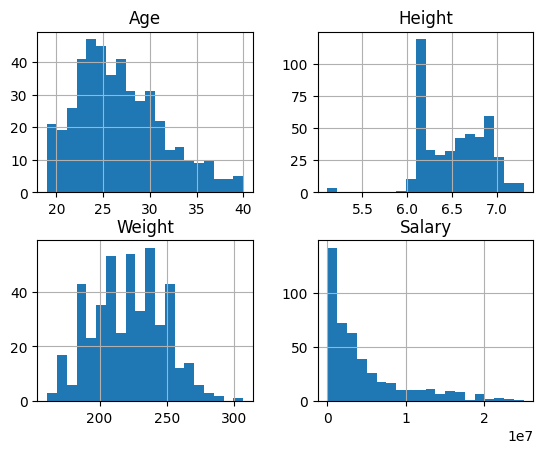

In [ ]:
# plotar histograma das medidas num√©ricas
df_clean.hist(bins=20)
plt.show()

Aqui temos n√£o s√≥ n√∫meros, mas representa√ß√µes gr√°ficas de nossas medidas e conseguimos ver como elas est√£o distribu√≠das.

 * Conseguimos visualizar que a vari√°vel `Age` (idade)tem como maioria atletas de 23 a 27 anos;
 * J√° a vari√°vel `Height` (altura) exibe que tem um alto volume de atletas do tamanho 6.2;
 * Falando da coluna `Weight` (peso), essa apresenta medidas bem distruibu√≠das entre os atletas;
 * E por fim, a vari√°vel `Salary` exibi que a maior parte dos atletas tem um sal√°rio baixo e atletas de sal√°rios milion√°rios s√£o para a minoria dos deles.

Foi trabalhoso, mas √© um processo necess√°rio e importantiss√≠mo para todo e qualquer projeto de an√°lise de dados.

DataFrame devidamente limpado e tratado, agora vamos ao momento mais esperado, analisar os dados. Vamos l√°!

## An√°lise dos Dados + Visualiza√ß√£o dos Dados
N√£o menos importante que a etapa anterior, aqui √© momento de extrair os mais variados insights, momento de responder problemas ou perguntas levantadas ao analista de dados. Com intuito de fazer uma an√°lise descritiva, vamos buscar o maior n√∫mero de informa√ß√µes poss√≠veis atrav√©s da an√°lise .

Al√©m da an√°lise, aqui tamb√©m traremos as visualiza√ß√µes dos principais insights que encontraremos, para isso vamos usar diferentes bibliotecas, me acompanhe e ver√° tudo isso a seguir.


Come√ßando por inform√ß√µes mais b√°sicas, vamos buscar o n√∫mero de franquias e de jogadores.

In [ ]:
# n√∫mero de franquias na NBA
df_clean["Team"].nunique()

30

In [ ]:
# n√∫mero de franquias por pa√≠s
df_clean.groupby("Team_Country")["Team"].nunique()

Team_Country
Canad√°             1
Estados Unidos    29
Name: Team, dtype: int64

A NBA tem 30 franquias, 29 dos Estados Unidos e uma do Canad√°.

In [ ]:
# m√©dia de idade dos atletas
df_clean["Age"].mean().round(0)

27.0

A m√©dia de idade da liga na temporada de 2015-2016 √© de 27 anos.

In [ ]:
# n√∫mero total de jogadores
df_clean["Name"].nunique()

457

Nosso DataFrame traz 457 jogadores distruibu√≠dos entre essas 30 franquias. Vamos ver esses n√∫meros distruibu√≠dos entre os times? Antes de fazer isso, vamos identificar qual √© a m√©dia de jogadores por equipe

In [ ]:
# m√©dia de atletas por time
media_atletas = df_clean["Name"].nunique() / df_clean["Team"].nunique()

# arredondar valores
media_atletas = round(media_atletas, 0)

print(media_atletas)


15.0


Identificamos que a m√©dia de jogadores por equipe na temporada 2015-2016 √© 15. Agora vamos calcular onde exatamente onde esses 457 jogadores est√£o distruibu√≠dos.

In [ ]:
# n√∫mero de jogadores por franquia
df_clean.groupby("Team")["Name"].size().sort_values(ascending=False)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Atlanta Hawks             15
Utah Jazz                 15
Toronto Raptors           15
San Antonio Spurs         15
Sacramento Kings          15
Portland Trail Blazers    15
Phoenix Suns              15
Philadelphia 76ers        15
Oklahoma City Thunder     15
Boston Celtics            15
Miami Heat                15
Los Angeles Lakers        15
Los Angeles Clippers      15
Indiana Pacers            15
Houston Rockets           15
Golden State Warriors     15
Detroit Pistons           15
Denver Nuggets            15
Dallas Mavericks          15
Cleveland Cavaliers       15
Chicago Bulls             15
Charlotte Hornets         15
Brooklyn Nets             15
Washington Wizards        15
Minnesota Timberwolves    14
Orlando Magic             14
Name: Name, dtype: int64

Os Pelicans foi a franquia que mais teve atletas na temporada 2015-2016, a franquia apresentou 19 atletas na temporada, 4 jogadores a mais do que a m√©dia das franquias. Em seguida vem o Memphis Grizzlies com 18, na sequ√™ncia os Knicks e o Milwaukee Bucks com 16, depois deles, 24 times apresentaram 15 atletas para temporada, por fim, aparecem os Timberwolves e Orlando Magic com 14.


Agora vamos visualizar todos esses n√∫meros de atletas por franquia atrav√©s de um gr√°fico waffle.

...

In [ ]:
# instalando biblioteca pywaffle
!pip install pywaffle -q

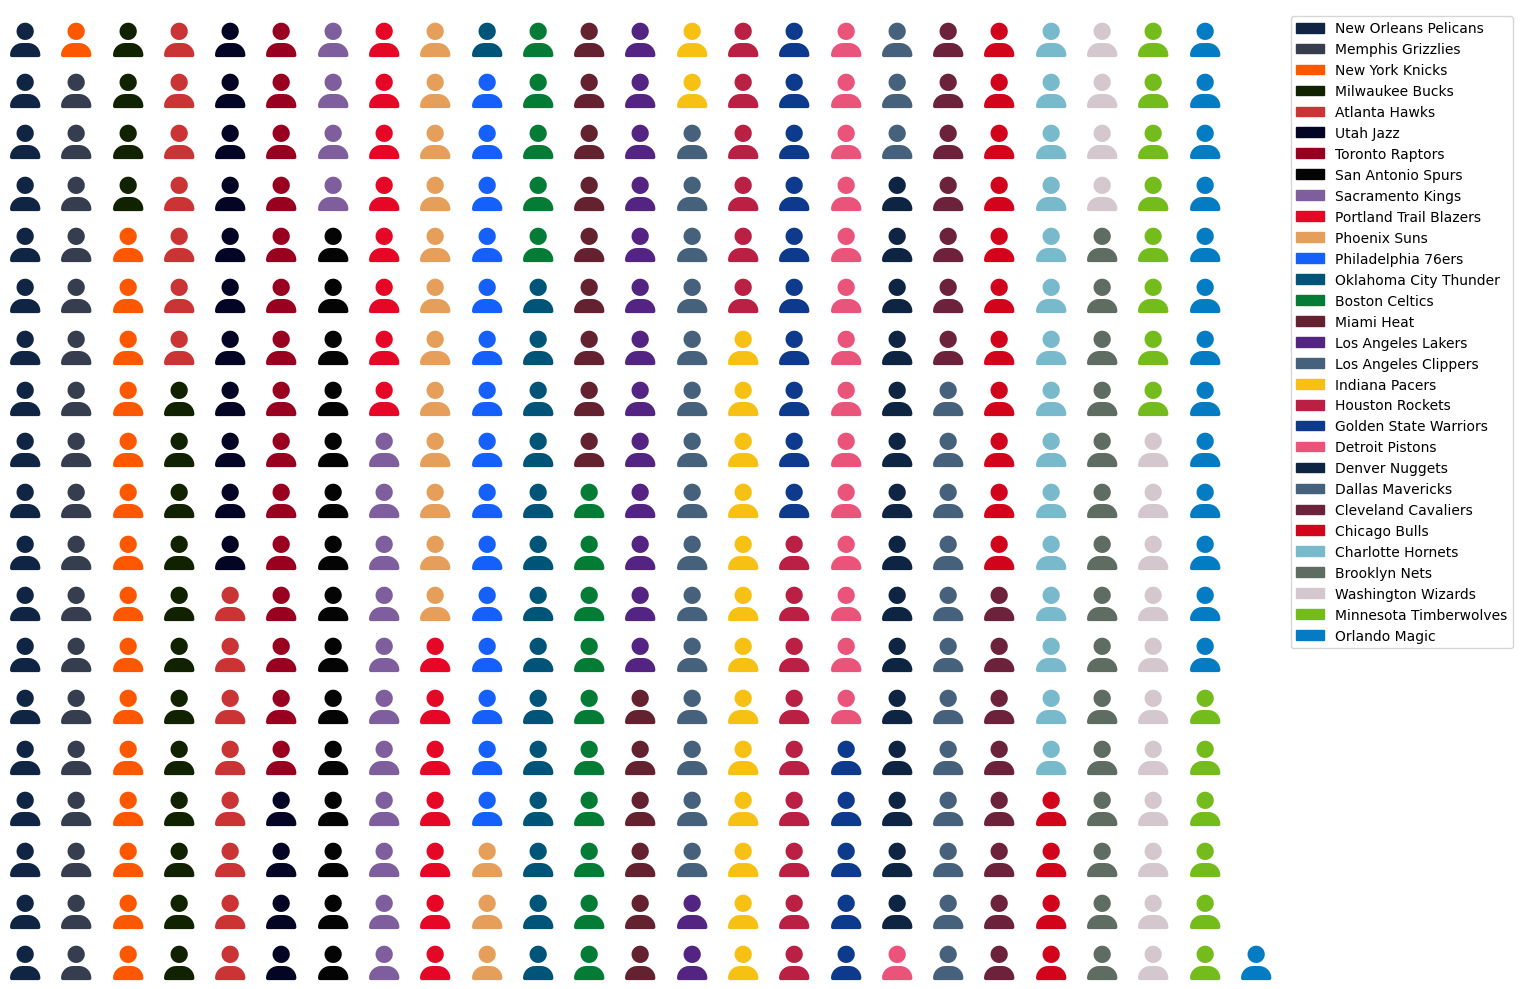

In [ ]:
# waffle chart - n√∫mero de jogadores por franquia
from pywaffle import Waffle

data = df_clean.groupby("Team")["Name"].size().sort_values(ascending=False)

# Criar um DataFrame com os dados
df_waffle = pd.DataFrame(data).reset_index()
df_waffle.columns = ['Team', 'Count']

# Criar um gr√°fico de waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=19,  # N√∫mero de linhas
    values=df_waffle['Count'],  # Valores
    colors=["#102444", "#353D4E", "#fd5800", "#112200", "#ca3435", "#040524", "#990020",
            "#040404", "#7f5e9d", "#e60626", "#e69f5a", "#1560fb", "#005477", "#057c35",
            "#64212f", "#542483","#46617b", "#f7c114", "#b92044", "#0d3a8c", "#eb547a",
            "#0e2443", "#46617b", "#6d223b", "#d2041c", "#78bacc", "#5e6c62", "#d4c7cd",
            "#74bc1c", "#047cc4"], # Cores
    icons='user',
    labels=list(df_waffle['Team']),  # R√≥tulos para cada quadrado
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(15, 10)  # Tamanho da figura
)

plt.show()

Mais de 450 atletas, esses distruibuidos por 30 equipes , tudo isso √© muito legal, mas cada atleta al√©m suas habilidades, tem suas caracter√≠sicas. Assim, a partir de agora vamos analisar esses n√∫meros, come√ßando nossa an√°lise por quem √© o atleta mais novo e o mais velho, quantos anos tem? Onde jogam? Qual posi√ß√£o? E muito mais...

Aqui vamos usar o m√©todo `.min()` e `.max()`.

In [ ]:
# atleta mais jovem
df_clean.groupby("Name")["Age"].min().sort_values(ascending=True).head(1)

Name
Rashad Vaughn    19
Name: Age, dtype: int64

In [ ]:
# detalhes do atleta mais jovem
df_clean.loc[df_clean["Name"] == "Rashad Vaughn"]

Name             Team Number Position  Age  Height  Weight  \
226  Rashad Vaughn  Milwaukee Bucks     20       SG   19     6.6   202.0   

    College     Salary Age_Group    Team_Country  
226    UNLV  1733040.0     19-20  Estados Unidos

O novato Rashad Vaughn, fazia sua temporada de estr√©ia como atleta da NBA com apenas 19 anos, jogando pelo Milwaukee Bucks.

In [ ]:
# atleta mais velho
df_clean.groupby("Name")["Age"].max().sort_values(ascending=False).head(1)

Name
Andre Miller    40
Name: Age, dtype: int64

In [ ]:
# detalhes do atleta mais velho
df_clean.loc[df_clean["Name"] == "Andre Miller"]

Name               Team Number Position  Age  Height  Weight  \
304  Andre Miller  San Antonio Spurs     24       PG   40     6.3   200.0   

    College    Salary Age_Group    Team_Country  
304    Utah  250750.0     36-40  Estados Unidos

O veterano Andre Miller, fazia sua √∫ltima temporada como atleta da NBA com 40 anos de idade, jogando pelo San Antonio Spurs.

Novatos, experientes, veteranos... A NBA tem atletas de v√°rias idades e √© isso que vamos ver na nossa pr√≥xma etapa. Lembra da coluna `Age_Group` que criamos na etapa de tratamento de dados? Pois √©, √© ela que vamos usar agora.


In [ ]:
# contando atletas por faixa et√°ria freq relativa
faixaetaria = df_clean["Age_Group"].value_counts().sort_index()

# calcular freq. relativa
frequencia_relativa = faixaetaria / len(df_clean)

# arredondar para duas casas decimais
frequencia_relativa = (frequencia_relativa * 100).round(1)

# exibir os resultador
resultado_df = pd.DataFrame({
    "N√∫m de Atletas": faixaetaria,
    "Freq. Relativa": frequencia_relativa.astype(str) + "%"
})

print(resultado_df)

       N√∫m de Atletas Freq. Relativa
19-20              21           4.6%
21-25             178          38.9%
26-30             167          36.5%
31-35              68          14.9%
36-40              23           5.0%


Aqui, eu trouxe al√©m dos n√∫meros absolutos, tamb√©m trouxe a frequ√™ncia relativa.

E conseguimos visualizar que um pouco mais de 75% dos atletas da temporada 2015-2016 tinham entre 21 a 30 anos. Trago um gr√°fico abaixo com os n√∫meros absolutos para visualizarmos isso.

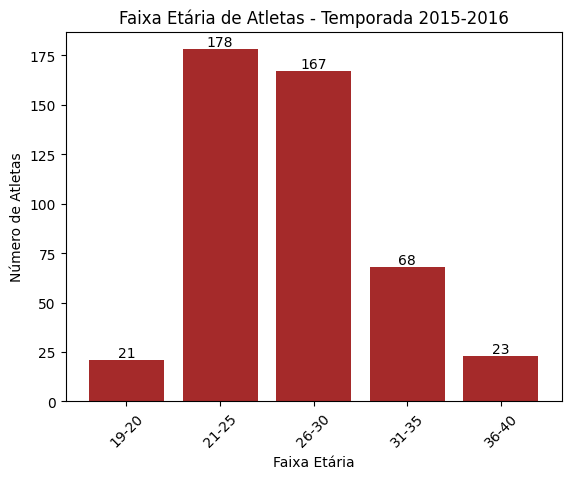

In [ ]:
# bar chart - atletas por faixa et√°ria
faixa_etaria = df_clean["Age_Group"].value_counts().sort_index()
faixa_etaria.plot(kind="bar", color="Brown", rot=45, width=0.8)

# Adicionar r√≥tulos de dados
for i, valor in enumerate(faixa_etaria):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

plt.title("Faixa Et√°ria de Atletas - Temporada 2015-2016")
plt.xlabel("Faixa Et√°ria")
plt.ylabel("N√∫mero de Atletas")

plt.show()

J√° que o assunto √© idade, vamos ver agora qual √© m√©dia de idade por franquia da temporada 2015-1016. Faremos isso plotando um gr√°fico de barras.

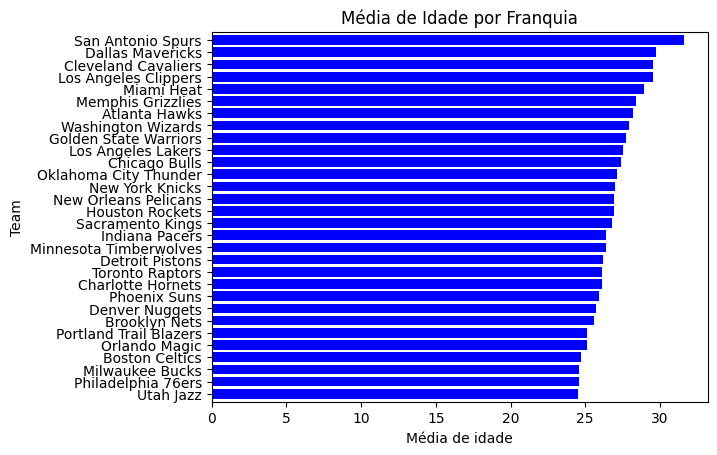

In [ ]:
# bar chart - m√©dia de idade por franquia
df_clean.groupby("Team")["Age"].mean().round(1).sort_values(ascending=True).plot(kind="barh", color="blue", width=0.8)
plt.title("M√©dia de Idade por Franquia")
plt.xlabel("M√©dia de idade")

plt.show()

A franquia San Antonio Spurs liderou a liga na temporada 2015-2016 quando o assunto √© m√©dia idade, a franquia ultrapassou a m√©dia de 30 anos de idade naquela temporda. O p√≥dio √© completado por Dallas Mavericks e Cleveland Cavaliers respectivamente.

Aproveitando que estamos calculando a m√©dia de idade por franquia, vamos fazer isso agora para altura e peso.

*Lembrando que as vari√°veis altura(`Height`) est√° em polegadas e peso(`Weight`) em libras*.

In [ ]:
# m√©dia de altura por franquia
df_clean.groupby("Team")["Height"].mean().round(1).sort_values(ascending=False)

Team
Toronto Raptors           6.7
Los Angeles Lakers        6.7
Boston Celtics            6.6
Utah Jazz                 6.6
Charlotte Hornets         6.6
Portland Trail Blazers    6.6
Detroit Pistons           6.6
Orlando Magic             6.6
New York Knicks           6.6
Atlanta Hawks             6.5
San Antonio Spurs         6.5
Sacramento Kings          6.5
Phoenix Suns              6.5
Philadelphia 76ers        6.5
New Orleans Pelicans      6.5
Miami Heat                6.5
Los Angeles Clippers      6.5
Houston Rockets           6.5
Golden State Warriors     6.5
Denver Nuggets            6.5
Dallas Mavericks          6.5
Cleveland Cavaliers       6.5
Chicago Bulls             6.5
Washington Wizards        6.5
Milwaukee Bucks           6.4
Minnesota Timberwolves    6.4
Memphis Grizzlies         6.4
Oklahoma City Thunder     6.4
Indiana Pacers            6.4
Brooklyn Nets             6.3
Name: Height, dtype: float64

Raptors e Lakers foram as franquias mais altas na temporada que estamos analisando, apresentaram uma m√©dia de 6.7 polegadas de m√©dia, fechamos o terceiro lugar com o Boston Celtics com uma m√©dia de 6.6 polegadas.

In [ ]:
# m√©dia de peso por franquia
df_clean.groupby("Team")["Weight"].mean().round(1).sort_values(ascending=False)

Team
Oklahoma City Thunder     229.4
Minnesota Timberwolves    228.6
Cleveland Cavaliers       227.9
Los Angeles Lakers        227.1
Dallas Mavericks          227.0
Golden State Warriors     224.6
Milwaukee Bucks           224.1
San Antonio Spurs         223.9
New York Knicks           223.6
Indiana Pacers            222.3
Detroit Pistons           222.2
Philadelphia 76ers        222.1
Toronto Raptors           221.8
Sacramento Kings          221.3
Atlanta Hawks             221.3
New Orleans Pelicans      221.0
Charlotte Hornets         220.4
Houston Rockets           220.3
Utah Jazz                 220.0
Los Angeles Clippers      219.7
Boston Celtics            219.5
Washington Wizards        219.0
Chicago Bulls             218.9
Phoenix Suns              218.6
Portland Trail Blazers    218.6
Miami Heat                218.4
Memphis Grizzlies         218.0
Denver Nuggets            217.5
Brooklyn Nets             215.6
Orlando Magic             213.4
Name: Weight, dtype: float64

J√° falando sobre peso em libras, quem esteve na primeira posi√ß√£o em m√©dia na temporada 2015-2016 foi o Oklahoma City Tunder, com uma m√©dia de 229.4 libras. Timberwolves e Cavaliers aparecem na sequ√™ncia, com o time de Minnesota tendo uma m√©dia de 228.6 libras e o time de Cleveland com uma m√©dia de 227.9 libras.

Analisando as duas vari√°veis vemos que as franquias n√£o se repetem falando sobre primeiras coloca√ß√µes. Ser√° que h√° uma correla√ß√£o na altura e peso dos atletas na NBA? Digo, ser√° que uma atleta mais alto, mas pesado ele √©? Parece ser uma boa hip√≥tese, mas vamos verificar isso atrav√©s de c√°lculos.

A seguir, vamos usar o m√©todo `.corr()`. O m√©todo `.corr()` na biblioteca pandas, por padr√£o, calcula a correla√ß√£o de Pearson entre as colunas de um DataFrame. A correla√ß√£o de Pearson √© uma medida estat√≠stica que avalia a rela√ß√£o linear entre duas vari√°veis cont√≠nuas. Ela varia de -1 a 1, onde -1 indica uma correla√ß√£o negativa perfeita, 1 indica uma correla√ß√£o positiva perfeita e 0 indica nenhuma correla√ß√£o linear.

In [ ]:
# correla√ß√£o entre altura e peso
df_corr = df_clean["Height"].corr(df["Weight"]).round(2)
print(df_corr)

0.29


Uma correla√ß√£o 0.29 entre duas vari√°veis, geralmente √© considerada uma correla√ß√£o fraca, sugere que h√° uma rela√ß√£o positiva entre altura e peso, mas n√£o √© muito forte.

Ciente disso, vamos criar um scatter plot, gr√°fico mais indicado para visualizar correla√ß√µes entre duas vari√°vies.

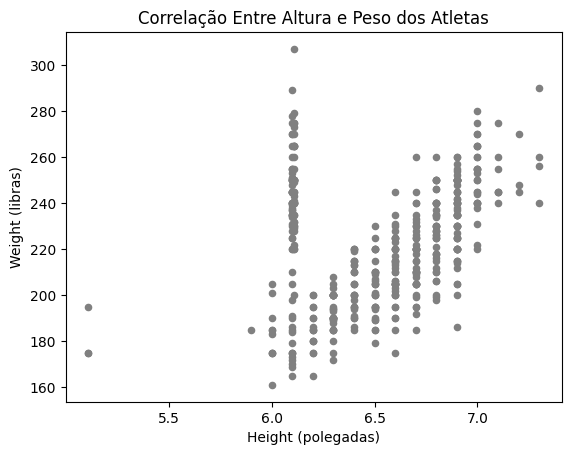

In [ ]:
# gr√°fico de dispers√£o - correla√ß√£o entre altura e peso
df_clean.plot(x='Height', y='Weight', kind="scatter", color="gray")
plt.title("Correla√ß√£o Entre Altura e Peso dos Atletas")
plt.xlabel("Height (polegadas)")
plt.ylabel("Weight (libras)")

plt.show()

Apesar de fraca, claramente √© poss√≠vel visualizar uma correla√ß√£o positiva entre altura e peso dos jogadores da temporada de 2015-2016. H√° uma fraca tend√™ncia de quando o atleta for mais alto mais pesado ele provavelmente ser√°.

Continuando falando sobre correla√ß√µes, vamos identificar se h√° correla√ß√£o entre todas as medidas do nosso DataFrame atrav√©s de um heatmap.

In [ ]:
# correla√ß√£o de medidas do DataFrame
df_clean_corr = df_clean.corr()
print(df_clean_corr)

             Age    Height    Weight    Salary
Age     1.000000 -0.053471  0.087183  0.208582
Height -0.053471  1.000000  0.293000 -0.033389
Weight  0.087183  0.293000  1.000000  0.138621
Salary  0.208582 -0.033389  0.138621  1.000000


<ipython-input-108-58f0060c8bf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean_corr = df_clean.corr()


Para criar um heatmap vamos usar a biblioteca
seaborn.

Seaborn √© uma biblioteca de visualiza√ß√£o de dados em Python baseada no Matplotlib. Ela fornece uma interface de alto n√≠vel para criar gr√°ficos estat√≠sticos atraentes e informativos. Projetada para trabalhar em conjunto com estruturas de dados do tipo DataFrame do pandas, a Seaborn simplifica a cria√ß√£o de visualiza√ß√µes estat√≠sticas, oferecendo fun√ß√µes que lidam automaticamente com detalhes de formata√ß√£o e estilo. Comumente usada para explorar e comunicar padr√µes em dados complexos, a Seaborn √© uma ferramenta valiosa em an√°lise de dados e ci√™ncia de dados.

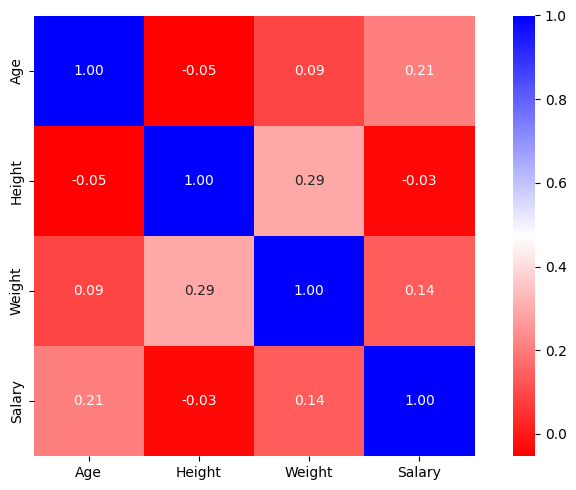

In [ ]:
# plotar heatmap de correla√ß√£o

# importando biblioteca seaborn
import seaborn as sns

# tamanho da figura
fig, ax = plt.subplots(figsize=(8, 5))

# plotando heatmap
sns.heatmap(df_clean_corr, fmt='.2f', square=True, cmap='bwr_r', linecolor='white', vmax=1.0, annot=True);

plt.tight_layout()


Nosso maior ponto de correla√ß√£o do heatmap √© exatamente entre altura e peso, com `0.29`, que como j√° em etapas anteriores, apesar de positiva √© uma correla√ß√£o fraca.

Outra correla√ß√£o interessante que √© poss√≠vel visualizar no heatmap que  apesar de ainda mais fraca mas positiva, √© a correla√ß√£o entre sal√°rio e idade com `0.21`. Essa correla√ß√£o apresenta que atletas mais velhos ganham mais que atletas mais jovens respectivamente.

Vamos ver essa correla√ß√£o atrav√©s de um scatter plot.

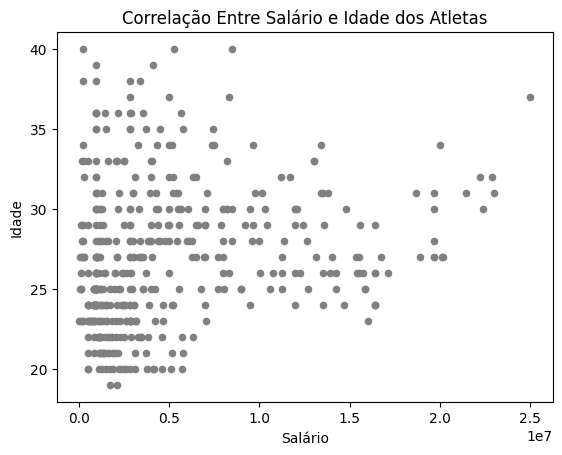

In [ ]:
# gr√°fico de dispers√£o - correla√ß√£o entre sal√°rio e idade
df_clean.plot(x="Salary", y="Age", kind="scatter", color="gray")
plt.title("Correla√ß√£o Entre Sal√°rio e Idade dos Atletas")
plt.xlabel("Sal√°rio")
plt.ylabel("Idade")

plt.show()

Podemos ver uma leve inclina√ß√£o positiva e muitos pontos espalhados pelo gr√°fico. Apesar de fazer sentido que o atleta quanto mais velho mais ele ganha, h√° tamb√©m alguns atletas veteranos ganhando baixos sal√°rios na temporada de 2015-2016.

Sal√°rio √© exatamente que vamos falar agora, qual seria os atletas mais ou menos pagos pela liga? Franquias com maiores e menores m√©dia de sal√°rio? E outra, qual a posi√ß√£o recebe o maior sal√°rio da NBA? Muitas perguntas e muito trabalho pela frente.

Vamos come√ßar somando do todo o sal√°rio da temporada.

In [ ]:
# total de sal√°rios
df_clean["Salary"].sum()

2191066914.0

UAU! muita grana. A liga gastou em sal√°rios na temporada 2015-2016: Mais de 2 bilh√µes.

A NBA realmente √© uma liga bilion√°ria, ciente disso, agora vamos ver todos esses sal√°rios distribu√≠dos por franquias, jogadores e sim, por posi√ß√£o.

Antes de come√ßar nossas an√°lise, gostaria de informar que para identificar a medida central do conjunto de dados com rela√ß√£o a vari√°vel sal√°rio, irei utilizar a mediana ao inv√©s da m√©dia. Medida apropriada para evitar que altos ou baixos n√∫meros, no nosso caso o sal√°rio altere muito nosso c√°lculo para encontrar uma medida central.

Em uma an√°lise pr√©via, identifiquei essa ser a melhor medida para essa vari√°vel. Para isso ent√£o usaremos o m√©todo `.median()`.

In [ ]:
# mediana de sal√°rio por franquia (TOP 10)
df_clean.groupby("Team")["Salary"].median().round(2).sort_values(ascending=False).head(10)

Team
Cleveland Cavaliers      4950000.0
Charlotte Hornets        4204200.0
Washington Wizards       4000000.0
Indiana Pacers           4000000.0
Orlando Magic            3956580.0
Dallas Mavericks         3950313.0
Golden State Warriors    3815000.0
Oklahoma City Thunder    3344000.0
Memphis Grizzlies        3190786.5
Sacramento Kings         3156600.0
Name: Salary, dtype: float64

Os Cavaliers tinham o topo dos times que mais gastavam em m√©dia de sal√°rios para atletas naquela temporada, o time de Clevaland gastou quase 5 milh√µes em m√©dia. Na sequ√™ncia vem os Hornets e os Wizards com 4 milh√µes e duzentos e 4 milh√µes respectivamente.

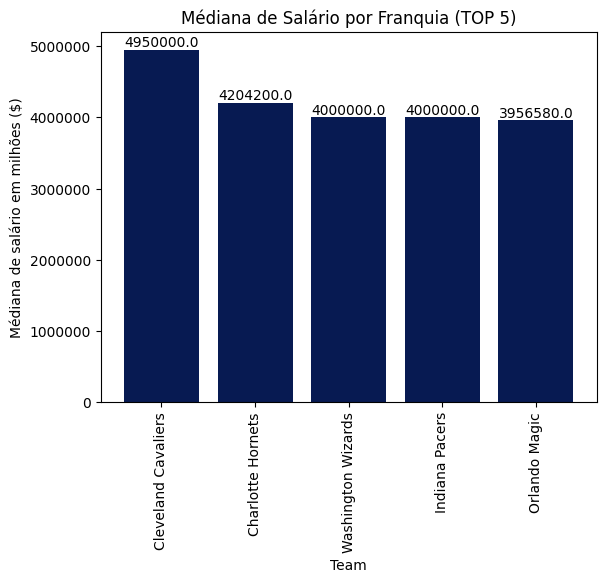

In [ ]:
# bar chart - mediana de sal√°rio por franquia (TOP 5)
top_salary_team = df_clean.groupby("Team")["Salary"].median().round(2).sort_values(ascending=False).head(5)
top_salary_team.plot(kind="bar", color="#071a52", width=0.8)
plt.title("M√©diana de Sal√°rio por Franquia (TOP 5)")
plt.ylabel("M√©diana de sal√°rio em milh√µes ($)")

# adicionar r√≥tulos de dados
for i, valor in enumerate(top_salary_team):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

# Ajustar a formata√ß√£o dos r√≥tulos do eixo x
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Aqui √© o mesmo c√°lculo executado acima s√≥ que em um gr√°fico.


In [ ]:
# atletas por sal√°rio
df_clean.groupby("Name")["Salary"].max().sort_values(ascending=False)

Name
Kobe Bryant               25000000.0
LeBron James              22970500.0
Carmelo Anthony           22875000.0
Dwight Howard             22359364.0
Chris Bosh                22192730.0
                             ...    
Jordan McRae                111196.0
Alan Williams                83397.0
Phil Pressey                 55722.0
Orlando Johnson              55722.0
Thanasis Antetokounmpo       30888.0
Name: Salary, Length: 457, dtype: float64

Aqui conseguimos visualizar o topo dos atletas mais bem pagos da NBA, mas para melhor ver isso, vamos criar um gr√°ficos de barras.

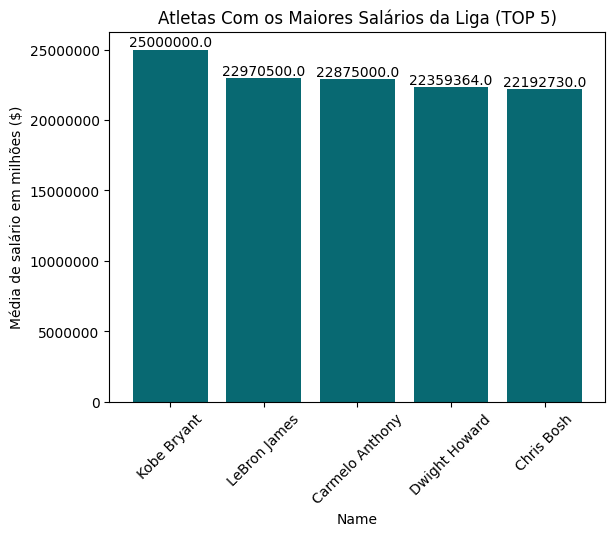

In [ ]:
# bar chart - atletas com o maior sal√°rio (Top 5)
top_salary_at = df_clean.groupby("Name")["Salary"].max().sort_values(ascending=False).head(5)
top_salary_at.plot(kind="bar", color="#086972", rot=45, width=0.8)
plt.title("Atletas Com os Maiores Sal√°rios da Liga (TOP 5)")
plt.ylabel("M√©dia de sal√°rio em milh√µes ($)")

# adicionar r√≥tulos de dados
for i, valor in enumerate(top_salary_at):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

# Ajustar a formata√ß√£o dos r√≥tulos do eixo y
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Ai voc√™ t√° falando da elite! Koke Bryant, LeBron James, Carmelo Anthony, Dwight Howard e Chris Bosh dominaram o topo de sal√°rios mais bem pagos da NBA em 2015-2016.

Kobe bateu 25 milh√µes de d√≥lares em sal√°rios naquela temporada, LeBron vem na sequ√™ncia com n√∫meros pr√≥ximos a 23 milh√µes, um pouco abaixo disso vem Carmelo com 22 milh√µes e 800 mil d√≥lares, pra fechar o topo dos 5 melhores vem sHoward e Bosh tamb√©m dentro da casa de 22 milh√µes.

Vamos saber mais desses 5 craques da bola laranja? Onde jogam? Quantos anos tem? Qual posi√ß√£o e mais...

In [ ]:
# detalhes dos atletas top 5 em sal√°rios
df_clean.nlargest(5, "Salary")

Name                 Team Number Position  Age  Height  \
109      Kobe Bryant   Los Angeles Lakers     24       SF   37    6.60   
169     LeBron James  Cleveland Cavaliers     23       SF   31    6.80   
33   Carmelo Anthony      New York Knicks      7       SF   32    6.80   
251    Dwight Howard      Houston Rockets     12        C   30    6.11   
339       Chris Bosh           Miami Heat      1       PF   32    6.11   

     Weight       College      Salary Age_Group    Team_Country  
109   212.0         Other  25000000.0     36-40  Estados Unidos  
169   250.0         Other  22970500.0     31-35  Estados Unidos  
33    240.0      Syracuse  22875000.0     31-35  Estados Unidos  
251   265.0         Other  22359364.0     26-30  Estados Unidos  
339   235.0  Georgia Tech  22192730.0     31-35  Estados Unidos

Acima todos os detalhes dos atletas mais bem pagos pela liga, e fica o insight que 3 dos 5 s√£o SF - Small Foward, Ala em portugu√™s. S√£o eles: Kobe Bryan, LeBron James e Carmelo Anthony. E todos j√° apresentam ter mais de 30 anos.

J√° estamos falando sobre posi√ß√£o, vamos ver como √© a distribui√ß√£o de sal√°rios entre elas.

In [ ]:
# mediana de sal√°rio por posi√ß√£o
df_clean.groupby("Position")["Salary"].median().round(2).sort_values(ascending=False)

Position
C     3811060.0
PG    2927470.0
PF    2877470.0
SG    2394102.5
SF    2041080.0
Name: Salary, dtype: float64

* A posi√ß√£o **center (piv√¥)** tem a m√©dia de sal√°rios, a m√©dia se apr√≥xima dos  4 milh√µes de d√≥lares, se qualificando a mais bem paga com rela√ß√£o as posi√ß√µes;

* Depois vem **point guard (armador)** pr√≥ximo dos 3 milh√µes em m√©dia;

* Na sequ√™ncia temos **point foward (ala-piv√¥)** com 2 milh√µes e 800 mil em m√©dia

* E nas duas √∫ltimas posi√ß√µes aparecem **shooting guard (ala-armador)** e **small foward (ala)** com 2 milh√µes 239 e com um mais de 2 milh√µes respectivamente.

Muitos n√∫meros, e novamente para melhor visualizarmos as informa√ß√µes, vamos plotar um gr√°fico de barras.

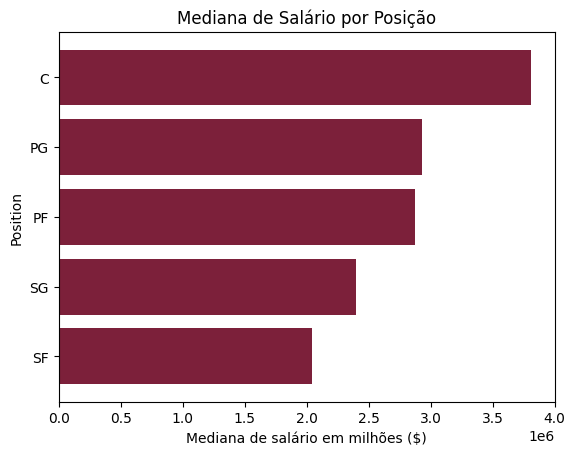

In [ ]:
# mediana de sal√°rio por posi√ß√£o
salary_per_position = df_clean.groupby("Position")["Salary"].median().round().sort_values(ascending=True)
salary_per_position.plot(kind="barh", color="#7c203a", width=0.8)

# Adicionar r√≥tulos de dados
#for i, valor in enumerate(salary_per_position):
#    plt.text(valor + 0.1, i, str(valor), ha='left', va='center')

plt.title("Mediana de Sal√°rio por Posi√ß√£o")
plt.xlabel("Mediana de sal√°rio em milh√µes ($)")

plt.show()

O gr√°fico apresenta o que vimos acima, a posi√ß√£o de piv√¥ (center) √© destacada a que mais ganha em sal√°rios.

J√° entendemos como as posi√ß√µes s√£o valorizadas com rela√ß√£o aos sal√°rios, mas como temos mais de 450 atletas, vamos ver como eles s√£o distribu√≠dos entre as posi√ß√µes. Ser√° que h√° demanda maior em determinadas posi√ß√µes?

In [ ]:
# n√∫mero de jogadores por posi√ß√£o
atleta_por_posicao  = df_clean.groupby("Position")["Name"].size().sort_values(ascending=False)

# calcular a frequ√™ncia relativa
freq_relativa = atleta_por_posicao / len(df_clean)

# arredondar para duas casas decimais
freq_relativa = (freq_relativa * 100).round(1)

# exibir os resultados
result_df = pd.DataFrame({
    'N√∫m. de Atletas': atleta_por_posicao,
    'Freq. Relativa (%)': freq_relativa.astype(str) + "%"
})

print(result_df)

          N√∫m. de Atletas Freq. Relativa (%)
Position                                    
SG                    102              22.3%
PF                    100              21.9%
PG                     92              20.1%
SF                     85              18.6%
C                      78              17.1%


Olhando nossa frequ√™ncia relativa conseguimos ver que a distruibui√ß√£o de jogadores por posi√ß√£o √© bem distruibu√≠da.

Abaixo apresento os n√∫meros:

* SG - Shooting Guard (ala-armador) - 22.3%
* PF - Power Forward (ala-piv√¥) - 21.9%
* PG - Point Guard (armador) - 20.1%
* SF - Small Forward (ala) - 18.6%
* C - Center (piv√¥) - 17.1%

Center (piv√¥) que em m√©dia tem o sal√°rio mais alto, √© a posi√ß√£o que menos atleta tem na liga, apresenta 17.1% dos atletas, provavelmente at√© por isso apresenta a maior medida de sal√°rio.

Os elencos s√£o recheados de shooting guard (ala-armador) √© o l√≠der de atletas por posi√ß√£o, apresentam n√∫meros de 22.3%, em seguida vem os power fowards (ala-piv√¥) e o point guard (armador) com 21.9% e 20.1% respectivamente.

A posi√ß√£o de Kobe Bryant e LeBron James, small foward (ala) √© apenas a 4¬™ colocada das 5 posi√ß√µes, apenas 18.6% joga nessa posi√ß√£o.

Seguindo com nossa an√°lise, sabemos que todo atleta tem sua origem e essa √© no College (universidade), com isso em mente, vamos identificar qual √© a universidade que mais cedeu atletas para a NBA na temporada 2015-2016. Al√©m de n√∫meros absolutos, aqui tamb√©m vamos trazer a frequ√™ncia relativa desses n√∫meros.

In [ ]:
# n√∫meros de atletas por College
atletas_college = df_clean.groupby("College").size().sort_values(ascending=False)

# calcular freq. relativa
freq__relativa = atletas_college / len(df_clean)

# arredondar para 1 casa decimal
freq__relativa = (freq__relativa * 100).round(1)

# exibir resultados
resultado_df = pd.DataFrame({
     "Freq. Relativa": freq__relativa.astype(str) + "%"
})

print(resultado_df)

               Freq. Relativa
College                      
Other                   18.4%
Kentucky                 4.8%
Duke                     4.4%
Kansas                   3.9%
North Carolina           3.5%
...                       ...
Kansas State             0.2%
Iowa State               0.2%
Iowa                     0.2%
IUPUI                    0.2%
Xavier                   0.2%

[119 rows x 1 columns]


18.4% dos atletas vieram de universidades que n√£o foram informadas, em uma an√°lise pr√©via, identificamos que esses atletas s√£o de fora dos Estados Unidos, nos dando o entendimento que a liga recebe muitos atletas estrangeiros.

Para fechar o top 5, apresento as 4 universidades americanas que mais disponibilizaram atletas para NBA na temporada 2015-2016:
* Kentucky - 4.8%
* Duke - 4.4%
* Kansas - 3.9%
* North Carolina - 3.5%


Frequ√™ncia relativa apresentada, chegou o momento de visualizar os n√∫meros absolutos das 10 primeiras universidades em um gr√°fico de barras.

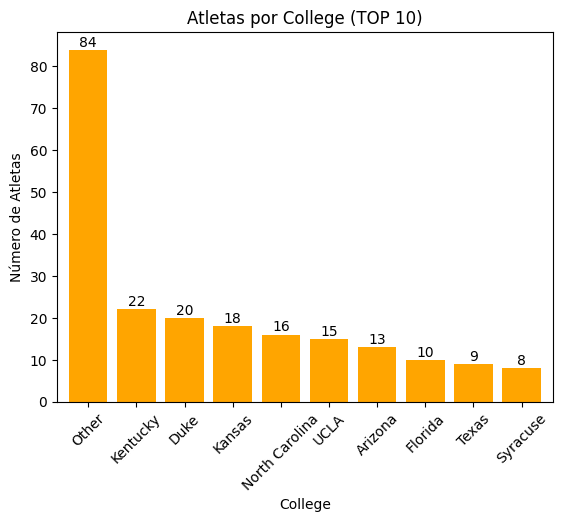

In [ ]:
# n√∫mero de atletas por College (TOP 10)
atletas_college = df_clean.groupby("College").size().sort_values(ascending=False).head(10)
atletas_college.plot(kind="bar", color="orange", rot=45, width=0.8)

# adicionar r√≥tulos de dados
for i, valor in enumerate(atletas_college):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

plt.title("Atletas por College (TOP 10)")
plt.ylabel("N√∫mero de Atletas")

# ajustar a formata√ß√£o dos r√≥tulos do eixo y
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Os 18.4% de atletas de origem `Other` como college representa 84 jogadores em n√∫meros absolutos.

Al√©m dos nomes j√° citados c√°lculo acima, temos tamb√©m North Carolina com 16 atletas, UCLA com 15, Arizona com 13, Florida com 10, Texas com 9 e na d√©cima posi√ß√£o temos Syracuse com 8 atletas.

Sabemos que a NBA formou uma gera√ß√£o √≠dolos e isso acontece toda temporada, ciente disso, **vamos finalizar nosso projeto** criando uma nuvem de palavras para identificar quais foram os nomes e sobrenomes mais comuns na temporada de 2015-2016. Ser√° que h√° refer√™ncias de atletas de outras √©pocas nos jogadores da temporada 2015-2016?

Para isso vamos utilizar a biblioteca `wordcloud`, ap√≥s concatenarmos a vari√°vel `Name` a bilbioteca calcula as palavras mais ocorridas nesta vari√°vel e apresenta atrav√©s de nuvem de palavras destacando das mais usadas para menos usadas.


In [ ]:
# nuvem de palavras Number
!pip install wordcloud -q

In [ ]:
# importar biblioteca wordcloud
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
# concatenar as palavras da vari√°vel Name
concatenated_names = df_clean["Name"].str.cat(sep=' ')

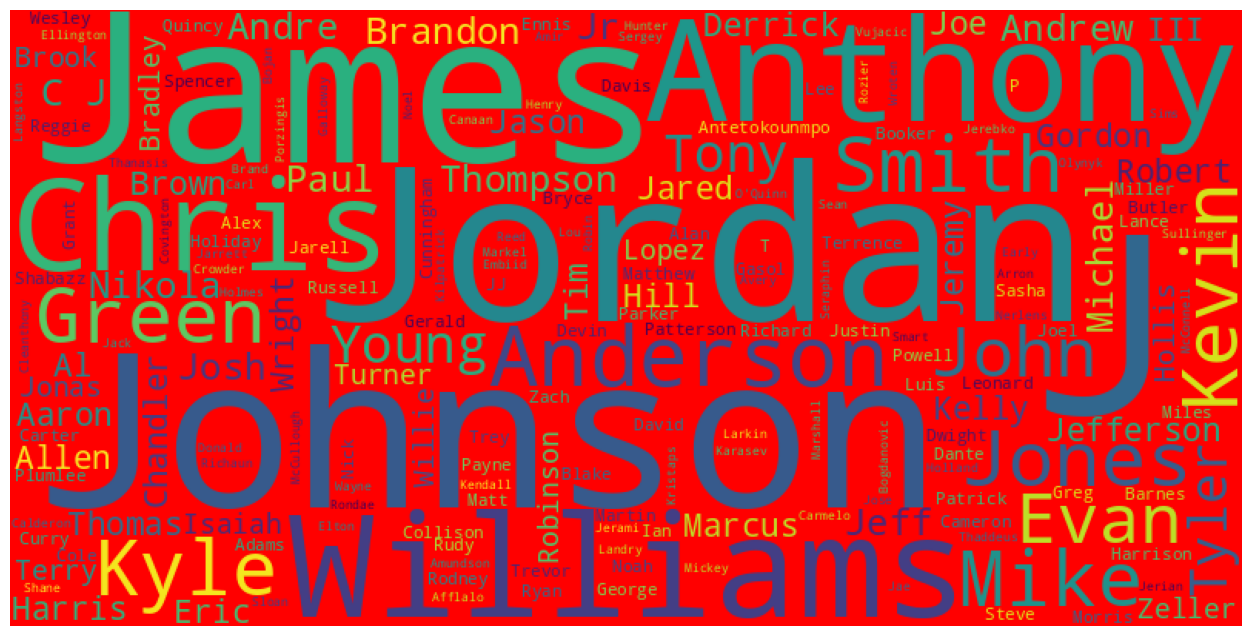

In [ ]:
    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color="Red").generate(concatenated_names)

    # Mostrar a imagem final
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud)

    # salvar arquivo
    wordcloud.to_file("NBANumbers.png")

Em destaque conseguimos ver nomes que mais se apresentam na vari√°vel `Name`. S√£o eles: Johnson, Jordan, James, Williams, Antony, Chris, Jones, Kyle e por ai vai.

Entendendo o mercado esportivo americano, d√° pra falar que esses nomes ou sobrenomes n√£o s√£o s√≥ comuns na NBA, como tamb√©m em outras ligas esportivas americanas, parecem ser sobrenomes bem comuns nos Estados Unidos.

Mas fica evidente tamb√©m, que muitos nomes de atletas da temporada 2015-2016 trazem refer√™ncias de grande √≠dolos que j√° estiveram na liga. Como os sobrenomes Jordan e Johnson, refer√™ncias a Michael Jordan e Magic Johnson atletas que dominaram a NBA em d√©cadas passadas.

An√°lises encerradas, vamos a conclus√£o do nosso projeto.

## Conclus√£o do Projeto

Esse projeto n√£o tem intuito de criar nenhum tipo de modelo ou algo do tipo e sim apenas realizar uma an√°lise descritiva do conte√∫do, extrair insights atrav√©s de estat√≠sticas descritivas e gr√°ficos devidamente escolhidos para apresenta√ß√£o do encontrado.

Al√©m de uma an√°lise quantitativa dos dados, tamb√©m foi necess√°rio uma an√°ise qualitativa das informa√ß√µes. Deixarei as refer√™ncias ao final do notebook.

O intuito foi trabalhar com o m√°ximo das vari√°veis dispon√≠veis poss√≠veis, todas elas tinham relev√¢ncia para o projeto, seja ela num√©rica ou categorica.

Por fim, o notebook al√©m de apresentar os insights encontrados, tamb√©m tentou de alguma forma explicar os conceitos e m√©todos utilizados.



### Insights Relevantes

* Identificamos que o Dataset abrange todas as franquias da NBA: 30 no total, sendo 29 dos Estados Unidos  e uma do Canad√°;

* Foram 457 atletas distruibu√≠dos entre essas 30 franquias e a m√©dia de idade deles foi de 27 anos, com o mais novo tendo de 19 anos e o mais velho tendo 40;

* Tamb√©m identificamos que h√° uma correla√ß√£o apesar de fraca positiva entre a altura e peso dos atletas, quanto esses mais altos mais pesado tende ele ser;

* Apesar de fazer sentido que um atleta quanto mais velho mais ele ganha, h√° tamb√©m muitos outros atletas veteranos ganhando baixos sal√°rios;

* Conseguimos visualizar que um pouco mais de 75% dos atletas da temporada 2015-2016 tinham entre 21 a 30 anos;

* A liga gastou mais de 2 bilh√µes em sal√°rios na temporada 2015-2016 e as franquias que mais ajudaram a inflar esses n√∫meros foram os Cavaliers, o time onde jogava Lebron James gastou quase 5 milh√µes em sal√°rios na m√©dia. Na sequ√™ncia vem os Hornets e os Wizards com 4 milh√µes e duzentos e 4 milh√µes respectivamente.

* O top 3 atletas mais bem pagos da NBA s√£o elas: Kobe Bryant, LeBron James e Carmelho Anthony;

* H√° um entendimento que mais de 18% dos atletas na temporada n√£o tem origem em universidades n√£o americanas, portanto, tem como origem universidades estrangeiras;

* A frequ√™ncia relativa revela que a distribui√ß√£o de jogadores por posi√ß√£o √© bem equilibrada, dos 457 atletas que teve a temporada, pr√≥ximo de 20% deles s√£o distruibu√≠dos entre as 5 posi√ß√µes;

* Piv√¥ √© a posi√ß√£o que maior apresentou m√©dia de sal√°rios.

* Sobrenomes como **Jordan** e **Johnson**, refer√™ncias a Michael Jordan e Magic Johnson atletas que dominaram a NBA em d√©cadas passadas apareceram muitas vezes na liga na temporada 2015-2016;

**Combinando esses insights com n√∫meros de stats e resultados das franquias na temporada, √© poss√≠vel identificar o melhor caminho para montar elencos com um bom custo-benef√≠cio e vitoriosos.**

Gostou dessa an√°lise? Espero que sim, deu muito trabalho, mas ao mesmo tempo foi muito divertido passar horas trabalhando nela.

Eu sou o Eric, analista de dados e apaixonado em extrair insights de grandes ou pequenos volumes de dados. Voc√™ pode encontrar mais dessas an√°lises em meu
[LinkedIn](https://https://www.linkedin.com/in/ericfruchi/). Fico aberto tamb√©m para receber qualquer d√∫vida ou sugest√£o.

Grande abra√ßo e at√© a pr√≥xima, ainda tem muitos dados por a√≠.üëã

### Refer√™ncias

* https://en.wikipedia.org/wiki/Rashad_Vaughn
* https://en.wikipedia.org/wiki/Andre_Miller